# Linear Regression to estimate high-order epistasis

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from gpmap import GenotypePhenotypeMap
from epistasis.models import EpistasisNonlinearRegression

# Define the nonlinear relationship and it's inverse.
def diminishing_returns(x, A):
    return 1.0 / (1 + A * np.exp(-x)) 

def reverse_func(y, A):
    return np.log(A) - np.log((1 / y) - 1)

# Initialize the model


model = EpistasisNonlinearRegression(
    function=diminishing_returns,
    reverse=reverse_func,
    model_type="global",
    A=2
)
model.add_gpm(gpm)

# Fit the model.
model.fit()
model.score()

0.90826551614987672

In [18]:
from epistasis.pyplot.nonlinear import plot_scale

In [19]:
yadd

array([ 0.88912836,  0.79673213,  0.94044015,  0.84804392,  0.83318975,
        0.74079352,  0.88450155,  0.79210532,  0.91689828,  0.82450205,
        0.96821008,  0.87581384,  0.86095967,  0.76856344,  0.91227147,
        0.81987524,  0.8725849 ,  0.78018867,  0.9238967 ,  0.83150047,
        0.8166463 ,  0.72425006,  0.86795809,  0.77556186,  0.90035482,
        0.80795859,  0.95166662,  0.85927039,  0.84441622,  0.75201999,
        0.89572801,  0.80333178])

In [23]:
ypred = model.function(yadd, **model.parameters)

In [24]:
from epistasis.stats import pearson

In [26]:
ypred

array([ 0.84966934,  0.83748238,  0.85610656,  0.84434584,  0.84238362,
        0.82972438,  0.8490774 ,  0.83685166,  0.85318209,  0.84122669,
        0.85949377,  0.84796073,  0.84603577,  0.83361192,  0.85260158,
        0.84060773,  0.84754398,  0.83521813,  0.85405657,  0.8421592 ,
        0.84017462,  0.82737433,  0.84694517,  0.83458036,  0.85109769,
        0.83900458,  0.857484  ,  0.84581559,  0.84386847,  0.83130461,
        0.85051038,  0.83837863])

In [27]:
gpm.phenotypes


array([ 0.898791  ,  0.80072929,  0.91890445,  0.85636863,  0.83729291,
        0.69709366,  0.89696103,  0.79309361,  0.91449267,  0.83401009,
        0.93615161,  0.87380998,  0.89047962,  0.7476163 ,  0.91042915,
        0.86580479,  0.88525427,  0.79052687,  0.90715977,  0.87125001,
        0.81276244,  0.67899143,  0.88717658,  0.78516578,  0.92413274,
        0.80250861,  0.92479935,  0.84830063,  0.85681154,  0.75769332,
        0.87725184,  0.79754828])

In [28]:
pearson(ypred, gpm.phenotypes)**2

0.90826551614987672

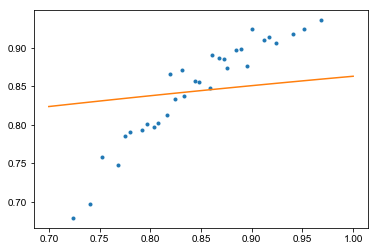

In [29]:
yadd = model.Additive.predict()
yobs = model.gpm.phenotypes

xx = np.linspace(.7, 1, 20)
yy = model.function(xx, **model.parameters)

plt.plot(yadd, yobs, '.')
plt.plot(xx, yy)

In [4]:
model.parameters

Parameters([('A',
             <Parameter 'A', value=0.43046832137539531 +/- 0.0338, bounds=[-inf:inf]>)])

In [5]:
xx = np.linspace(.6, 1, 20)
model.function(xx, **model.parameters)

array([ 0.80890048,  0.81213366,  0.81532463,  0.81847351,  0.82158045,
        0.82464561,  0.82766915,  0.83065127,  0.83359216,  0.83649203,
        0.8393511 ,  0.84216961,  0.84494781,  0.84768595,  0.8503843 ,
        0.85304314,  0.85566274,  0.8582434 ,  0.86078544,  0.86328915])

[ 0.82737431  0.8292005   0.83101131  0.83280679  0.834587    0.83635197
  0.83810177  0.83983644  0.84155604  0.84326062  0.84495024  0.84662496
  0.84828483  0.84992993  0.85156031  0.85317604  0.85477719  0.85636381
  0.85793597  0.85949375]


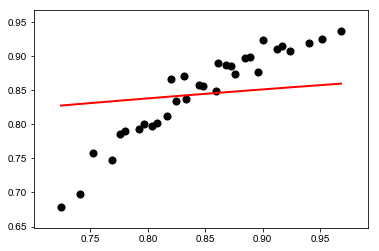

In [6]:
plot_scale(model)